In [1]:
import pandas as pd
import pickle

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from sklearn.metrics import mean_squared_error
import sklearn
print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.7.0


In [8]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import root_mean_squared_error

In [2]:
df = pd.read_parquet('data/green_tripdata_2021-02.parquet')

In [22]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

df = df[(df.duration >= 1) & (df.duration <= 60)]

categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

df.PULocationID.dtype

df[categorical] = df[categorical].astype(str)


In [16]:
#sns.distplot(df.duration)

In [17]:
#df.duration.describe(percentiles=[0.95,0.98,0.99])

In [7]:
#(df.duration >=1)

In [14]:
df.PULocationID.dtype

dtype('O')

In [17]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [18]:
dv=DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [19]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 193716 stored elements and shape (64572, 505)>

In [20]:
#dv.feature_names_

In [21]:
target = 'duration'
y_train=df[target].values

In [22]:
y_train

array([17.91666667,  6.5       , 15.25      , ..., 14.        ,
        7.        ,  7.        ], shape=(64572,))

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_pred = lr.predict(X_train)

/tmp/ipykernel_4212/437147669.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_4212/437147669.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


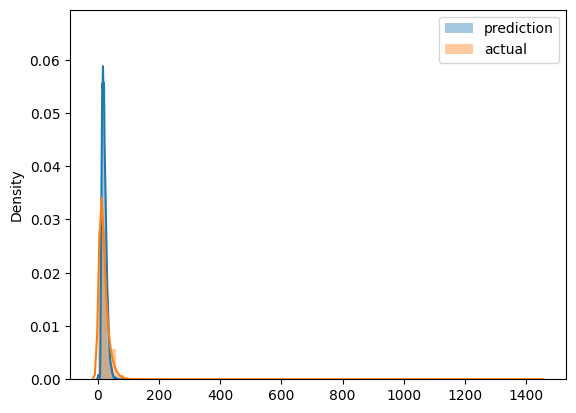

In [25]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()


In [26]:
root_mean_squared_error(y_train, y_pred)

52.582604683283016